In [118]:

import json
import numpy as np
import matplotlib.pyplot as plt

import led_config_utils as utils
from impossible_dialogue import led_config

from importlib import reload
reload(led_config_utils)
reload(led_config)

<module 'impossible_dialogue.led_config' from '/Users/pitzer/Documents/workspace/impossible_dialogue/impossible_dialogue/led_config.py'>

Processing face_front
Flipping line segment [[-0.198, 0.751, 0.581], [-0.193, 0.760, 0.580]]
Flipping line segment [[-0.202, 0.742, 0.583], [-0.198, 0.751, 0.581]]
Flipping line segment [[-0.206, 0.733, 0.584], [-0.202, 0.742, 0.583]]
Flipping line segment [[-0.209, 0.724, 0.586], [-0.206, 0.733, 0.584]]
Flipping line segment [[-0.212, 0.715, 0.588], [-0.209, 0.724, 0.586]]
Flipping line segment [[-0.215, 0.705, 0.589], [-0.212, 0.715, 0.588]]
Flipping line segment [[-0.217, 0.695, 0.591], [-0.215, 0.705, 0.589]]
Flipping line segment [[-0.218, 0.686, 0.593], [-0.217, 0.695, 0.591]]
Flipping line segment [[-0.220, 0.676, 0.594], [-0.218, 0.686, 0.593]]
Flipping line segment [[-0.220, 0.666, 0.596], [-0.220, 0.676, 0.594]]
Flipping line segment [[-0.220, 0.656, 0.598], [-0.220, 0.666, 0.596]]
Flipping line segment [[-0.220, 0.646, 0.600], [-0.220, 0.656, 0.598]]
Flipping line segment [[-0.219, 0.637, 0.601], [-0.220, 0.646, 0.600]]
Flipping line segment [[-0.218, 0.627, 0.603], [-0.219,

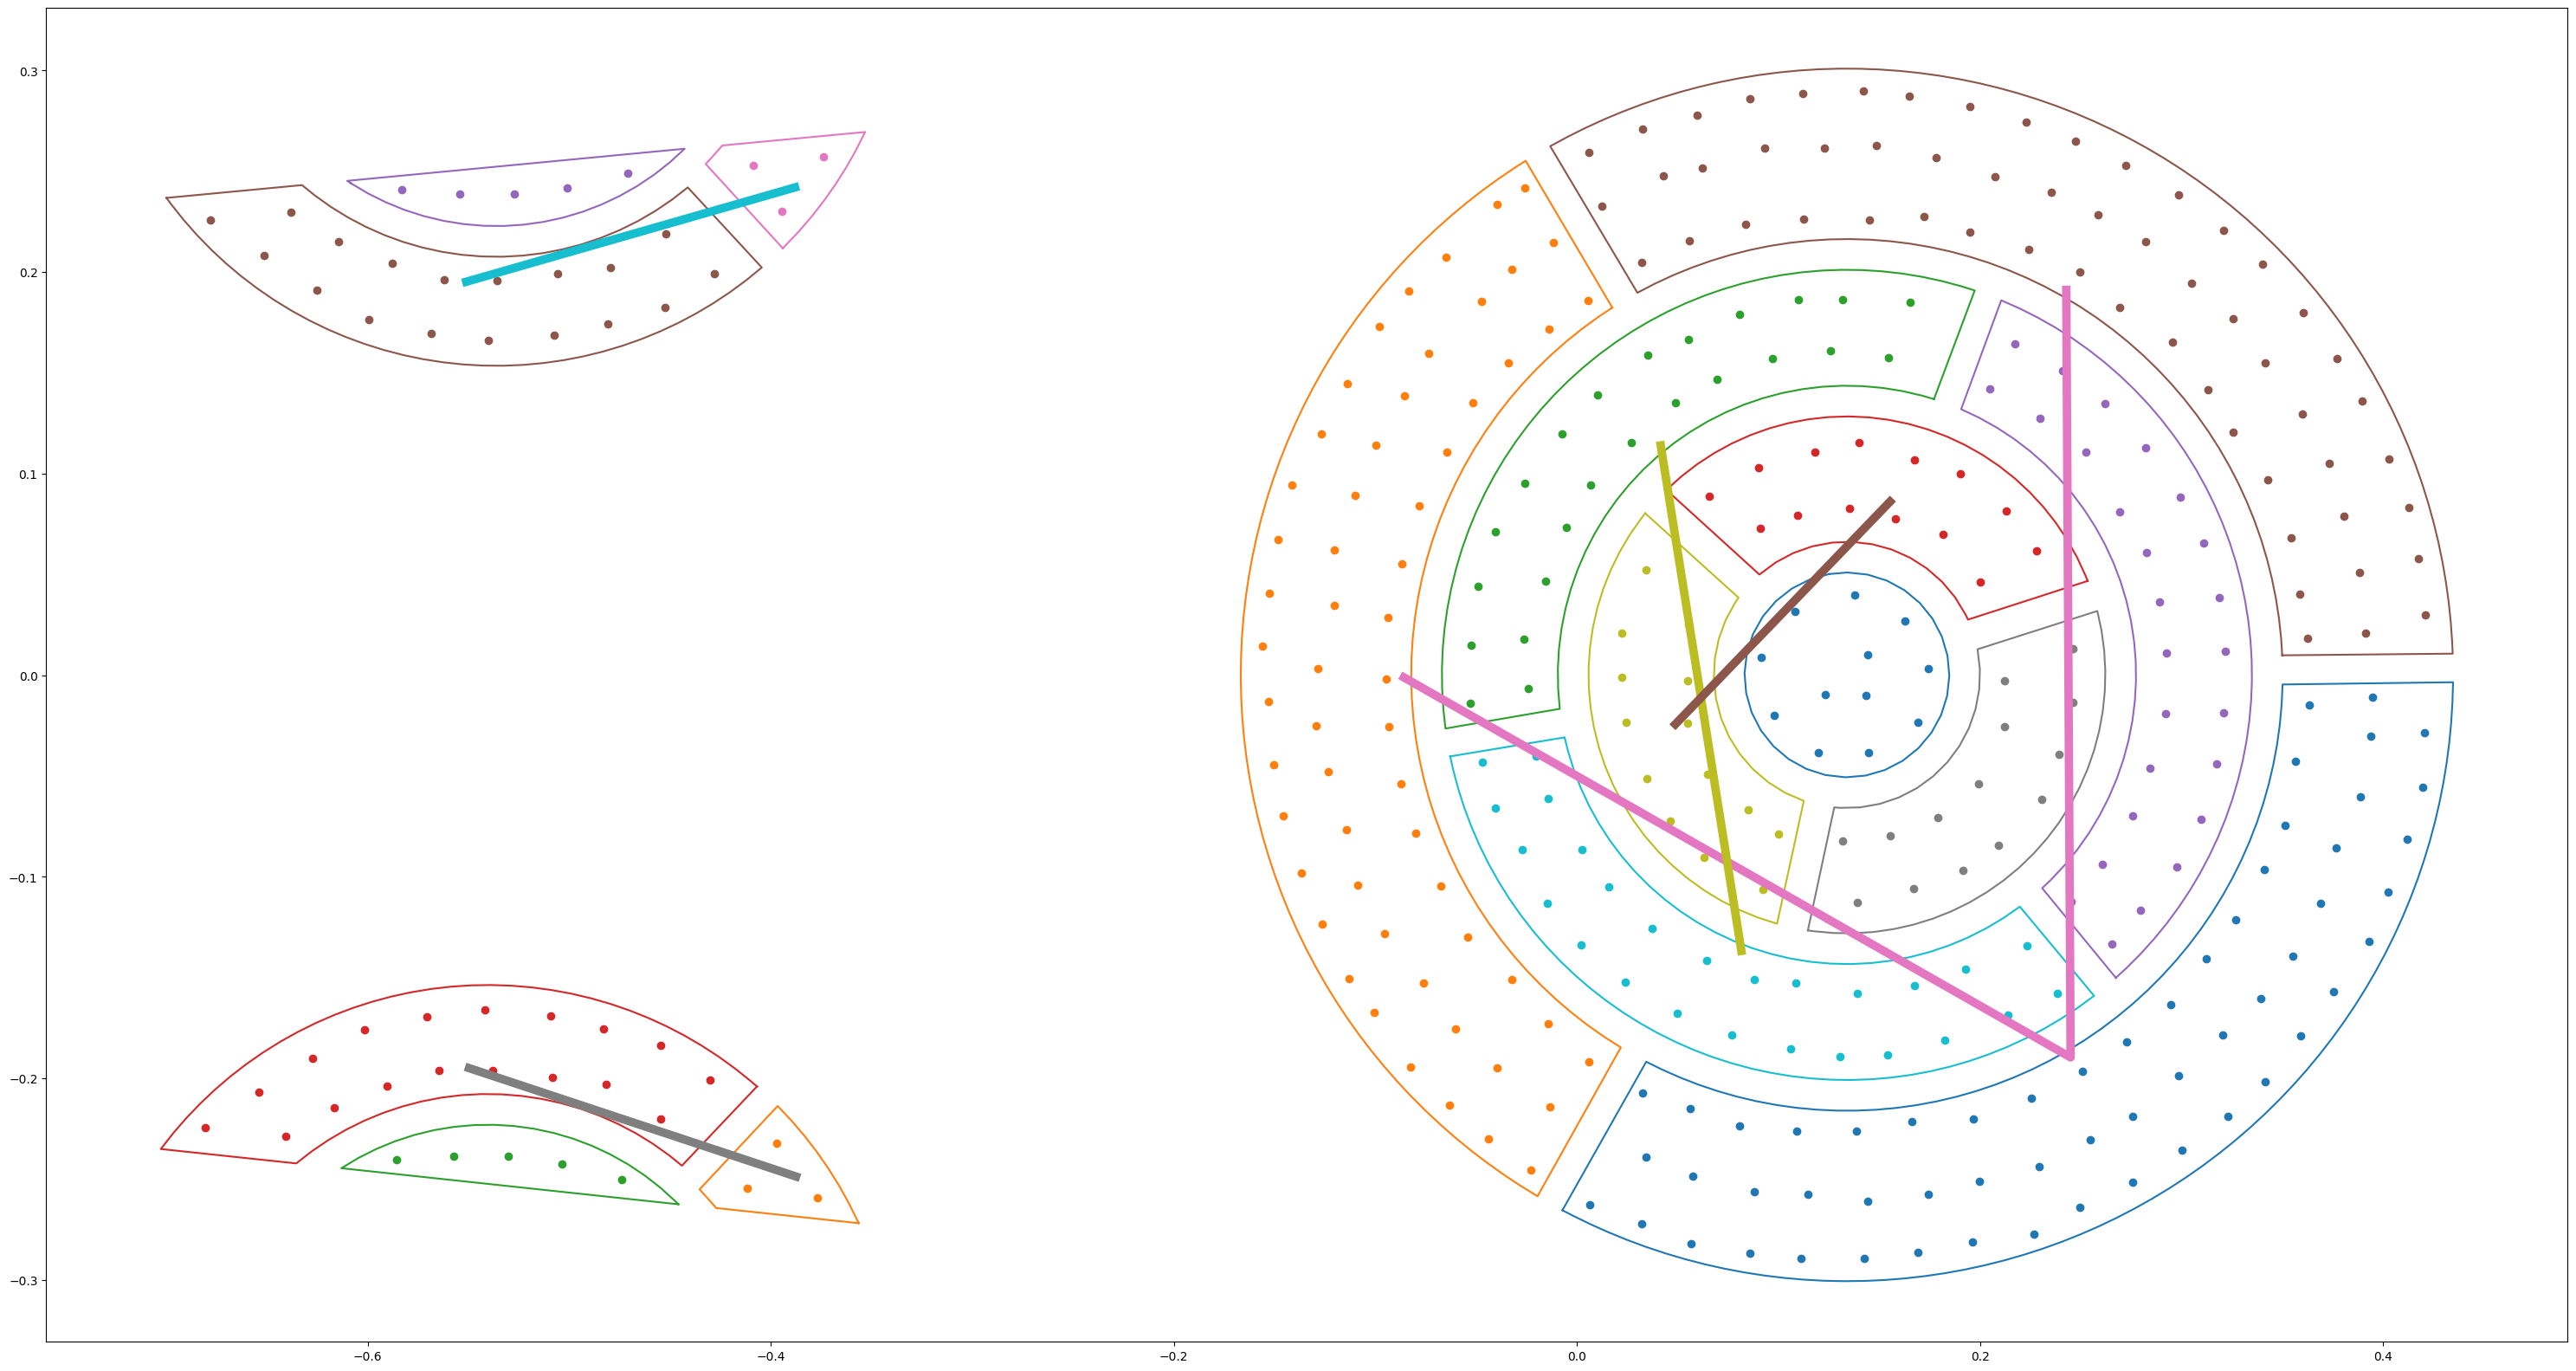

Processing face_front_right
Flipping line segment [[-0.281, 1.415, 0.442], [-0.290, 1.329, 0.457]]
Flipping line segment [[-0.290, 1.329, 0.457], [-0.290, 1.331, 0.456]]
Flipping line segment [[-0.391, 1.325, 0.283], [-0.364, 1.317, 0.332]]
Flipping line segment [[-0.429, 1.180, 0.268], [-0.403, 1.214, 0.302]]
Flipping line segment [[-0.431, 1.188, 0.262], [-0.429, 1.180, 0.268]]
Flipping line segment [[-0.432, 1.197, 0.257], [-0.431, 1.188, 0.262]]
Flipping line segment [[-0.433, 1.205, 0.252], [-0.432, 1.197, 0.257]]
Flipping line segment [[-0.434, 1.214, 0.247], [-0.433, 1.205, 0.252]]
Flipping line segment [[-0.435, 1.223, 0.243], [-0.434, 1.214, 0.247]]
Flipping line segment [[-0.435, 1.232, 0.239], [-0.435, 1.223, 0.243]]
Flipping line segment [[-0.435, 1.242, 0.236], [-0.435, 1.232, 0.239]]
Flipping line segment [[-0.435, 1.251, 0.232], [-0.435, 1.242, 0.236]]
Flipping line segment [[-0.435, 1.261, 0.230], [-0.435, 1.251, 0.232]]
Flipping line segment [[-0.434, 1.270, 0.227], [-

KeyError: '-0.290, 1.331, 0.456'

<Figure size 10000x2000 with 0 Axes>

In [119]:
all_segments = {}
all_polygons = []
design = "design2"
for face_index, face in enumerate(['face_front', 'face_front_right', 'face_front_left']):
# for face_index, face in enumerate(['face_front']):
    print(f'Processing {face}')
    fig = plt.figure(face_index)
    polygon_segments = utils.read_line_segments(f'../config/{design}/{face}_polygon_line_segments.csv')
    polygons = utils.create_polygons_from_segments(polygon_segments)
    polygons_2d, U, mu = utils.project_polygons_2d(polygons)
    utils.plot_polygons_2d(polygons_2d)
    polygon_index_offset = len(all_polygons)
    all_polygons.extend(polygons)

    path_segments = utils.read_line_segments(f'../config/{design}/{face}_led_line_segments.csv')
    paths = utils.create_paths(path_segments)
    print(f"Number of paths: {len(paths)}")
    for path_index, path in enumerate(paths): 
        print(f"Processing path {path_index}")
        path_2d = utils.project_path_2d(path, U, mu)
        # utils.plot_path_2d(path_2d)
        polygon_indices = utils.find_polygon_indices(path_2d, polygons_2d, polygon_index_offset)
        polygon_path, num_points_in_polygons = utils.create_polygon_path(
            polygon_indices, all_polygons)
        polygon_path_2d = utils.project_path_2d(polygon_path, U, mu)
        utils.plot_path_2d(polygon_path_2d)

        if len(path.vertices) == 0:
            print('No points available.')
            continue

        print(f"Path points: {len(path.vertices)}, Polygon path points: {len(polygon_path.vertices)}")
        # print(f"Polygon indices: {polygon_indices}")
        uid = face_index * 10 + path_index
        name = f"face_{uid}"
        segment = led_config.Segment(uid=uid, name=name, 
                                     points=np.array(path.vertices),
                                     num_leds=len(path.vertices), length=0,
                                     polygon_indices=np.array(polygon_indices),
                                     polygon_centers=np.array(polygon_path.vertices),
                                     num_points_in_polygons=np.array(num_points_in_polygons),
                                     points_2d=np.array(path_2d.vertices))
        print(f'Segment {segment.name}: length={segment.length}.1fm, num_leds={segment.num_leds}')
        all_segments[name] = segment
    
    plt.axis('scaled')
    plt.show()
    plt.rcParams['figure.figsize'] = [100, 20]

Segment: front_mouth, num_points: 112


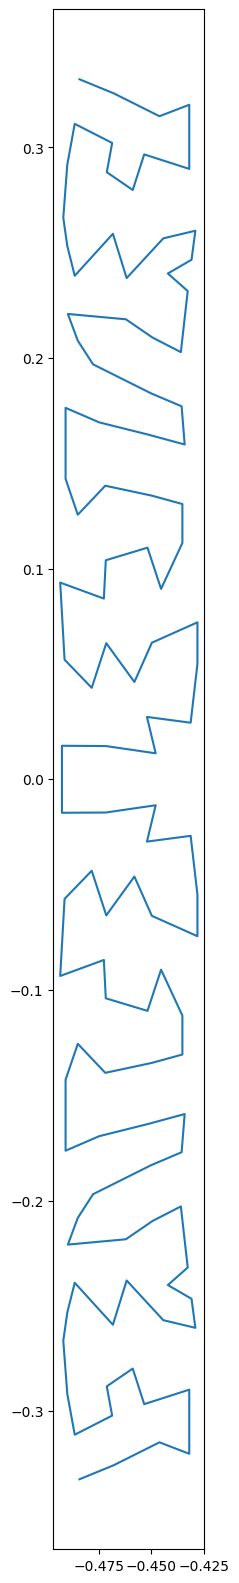

Segment: front_nose_eyes, num_points: 314


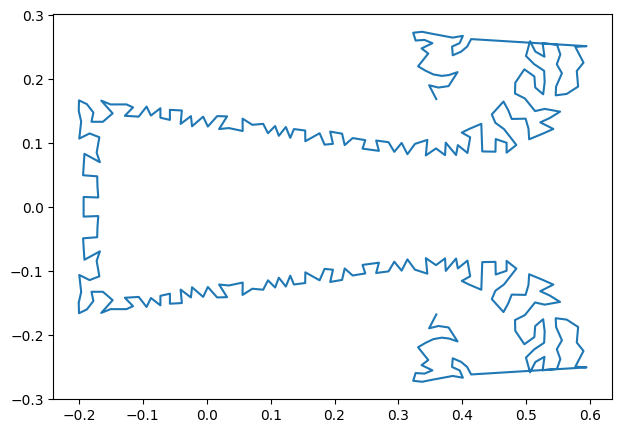

Segment: front_right_mouth, num_points: 62


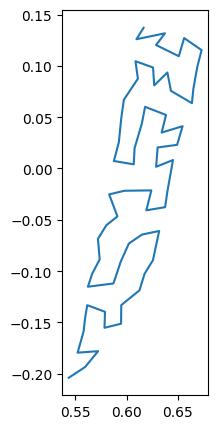

Segment: front_right_eyes, num_points: 184


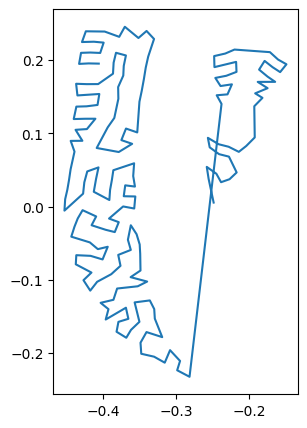

Segment: front_left_mouth, num_points: 62


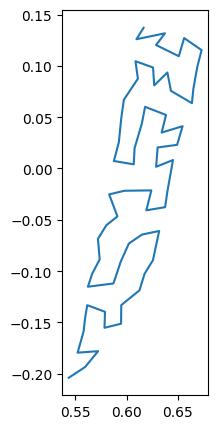

Segment: front_left_eyes, num_points: 184


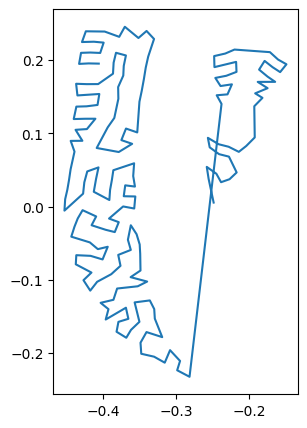

In [ ]:
merge_config = [
    ("front_nose_eyes", [("face_4", True), ("face_0", True), ("face_1", False), ("face_5", False)]),
    ("front_mouth", [("face_2", False), ("face_3", True)]),
    ("front_right_eyes", [("face_12", False), ("face_11", False)]),
    ("front_right_mouth", [("face_10", False)]),
    ("front_left_eyes", [("face_22", False), ("face_21", False)]),
    ("front_left_mouth", [("face_20", False)]),
]

# for merge_list in [SEGMENT_1, SEGMENT_2, SEGMENT_3, SEGMENT_4, SEGMENT_5, SEGMENT_6]:
for merged_name, merge_list in merge_config:
    name1, flip1 = merge_list[0]
    segment1 = all_segments[name1]
    if flip1:
        segment1.flip()
    for name2, flip2 in merge_list[1:]:
        segment2 = all_segments.pop(name2)
        if flip2:
            segment2.flip()
        segment1.merge(segment2)
    segment1.name = merged_name

for segment in all_segments.values():
    print(f"Segment: {segment.name}, num_points: {len(segment.points)}")
    utils.plot_segment(segment)

In [ ]:
# Create LED config
config = led_config.LedConfig()
config.polygons = all_polygons
for segment in all_segments.values():
    config.led_segments.append(segment)
    config.total_num_segments += 1
    config.total_length += segment.length
    config.total_num_leds += segment.num_leds

with open(f'../config/led_config_{design}.json', 'w', encoding='utf-8') as f:
    json.dump(config.to_dict(), f, ensure_ascii=False, indent=4)